In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

guest_ids = [f"G{str(i).zfill(3)}" for i in range(1, 51)]
emotions = ["Happy", "Neutral", "Bored", "Excited", "Sad"]
activities = ["Welcome Speech", "Snacks Served", "Live Band", "Dance Floor Open", "Speech", "Game Activity"]
time_slots = pd.date_range("18:00", "23:00", freq="15min").strftime("%H:%M")


In [2]:
mock_data = []
for _ in range(300):
    guest = np.random.choice(guest_ids)
    time = np.random.choice(time_slots)
    emotion = np.random.choice(emotions, p=[0.3, 0.25, 0.2, 0.2, 0.05])
    activity = np.random.choice(activities)
    mock_data.append([guest, time, emotion, activity])



In [4]:
df_mock = pd.DataFrame(mock_data, columns=["Guest_ID", "Timestamp", "Emotion", "Activity"])

csv_path = "C:/Users/Administrator/Downloads/emotion_event_data.csv"
df_mock.to_csv(csv_path, index=False)

('C:/Users/Administrator/Downloads/emotion_event_data.csv',
 'C:/Users/Administrator/Downloads/emotion_trend_plot.png')

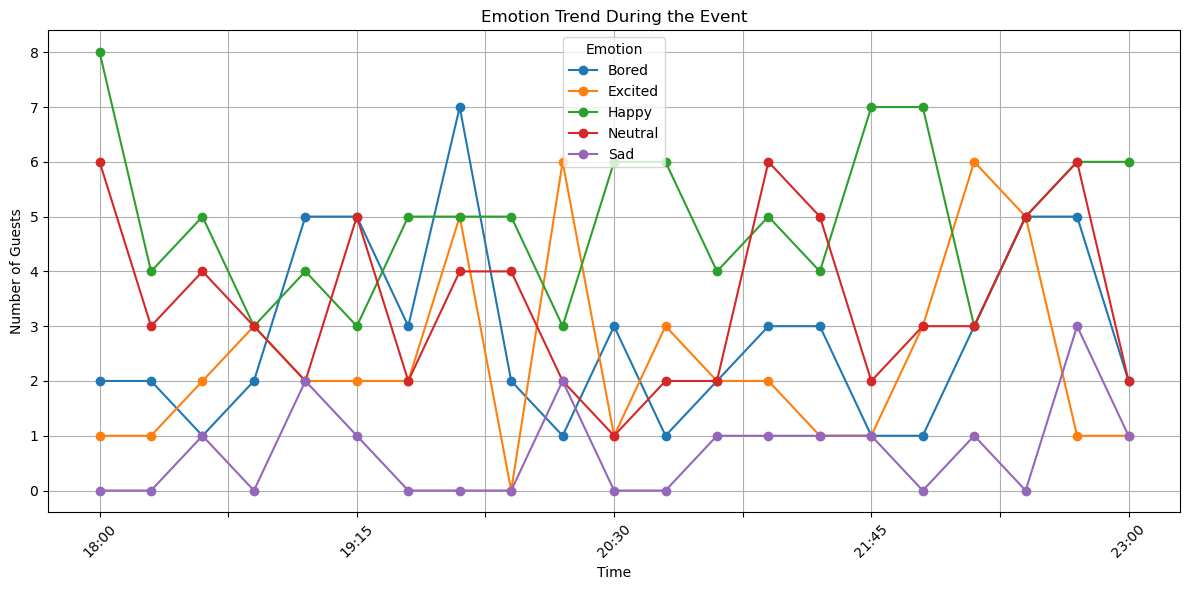

In [5]:
emotion_time = df_mock.groupby(["Timestamp", "Emotion"]).size().unstack(fill_value=0)
emotion_time_plot = emotion_time.plot(figsize=(12, 6), marker='o')
plt.title("Emotion Trend During the Event")
plt.xlabel("Time")
plt.ylabel("Number of Guests")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plot_path = "C:/Users/Administrator/Downloads/emotion_trend_plot.png"
plt.savefig(plot_path)

csv_path, plot_path